# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the `whale_analysis.ipynb` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
whale_navs_df = pd.read_csv(
    Path('../Starter_Code/Resources/whale_navs.csv'),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True
)

In [3]:
# Review the first 5 rows of the DataFrame
whale_navs_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [4]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
whale_navs_df["pct_change"] = whale_navs_df["S&P 500"].pct_change()
whale_navs_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,pct_change
date,,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35,NaN
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38,0.000154
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52,0.011009
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29,-0.001170
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26,-0.015436
...,...,...,...,...,...,...
2020-09-04,31.546221,14.364969,63.319419,64.668648,342.57,-0.008165
2020-09-08,31.491425,14.337851,63.238988,64.344083,333.21,-0.027323
2020-09-09,31.526541,14.368297,63.409792,64.460992,339.79,0.019747


In [5]:
# Drop any rows with all missing values
whale_navs_df = whale_navs_df.dropna()
whale_navs_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,pct_change
date,,,,,,
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38,0.000154
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52,0.011009
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29,-0.001170
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26,-0.015436
2014-10-08,31.976694,15.000260,60.008249,52.049662,196.64,0.017489
...,...,...,...,...,...,...
2020-09-04,31.546221,14.364969,63.319419,64.668648,342.57,-0.008165
2020-09-08,31.491425,14.337851,63.238988,64.344083,333.21,-0.027323
2020-09-09,31.526541,14.368297,63.409792,64.460992,339.79,0.019747


In [6]:
# Review the first five rows of the daily returns DataFrame.
whale_navs_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,pct_change
date,,,,,,
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38,0.000154
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52,0.011009
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29,-0.001170
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26,-0.015436
2014-10-08,31.976694,15.000260,60.008249,52.049662,196.64,0.017489


---

## Quantative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [7]:

# Calculate the daily return using the 'pct_change()' function
daily_returns = whale_navs_df[whale_navs_df.columns[0:5]].pct_change().dropna()
#daily_returns.drop(columns=['pct_change'], inplace=True)
daily_returns.head() 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489
2014-10-09,-0.003525,-0.000769,-0.000367,-0.000915,-0.019833


<AxesSubplot:title={'center':'Daily Returns 2014-2020 of the 4 funds and the S&P 500'}, xlabel='date'>

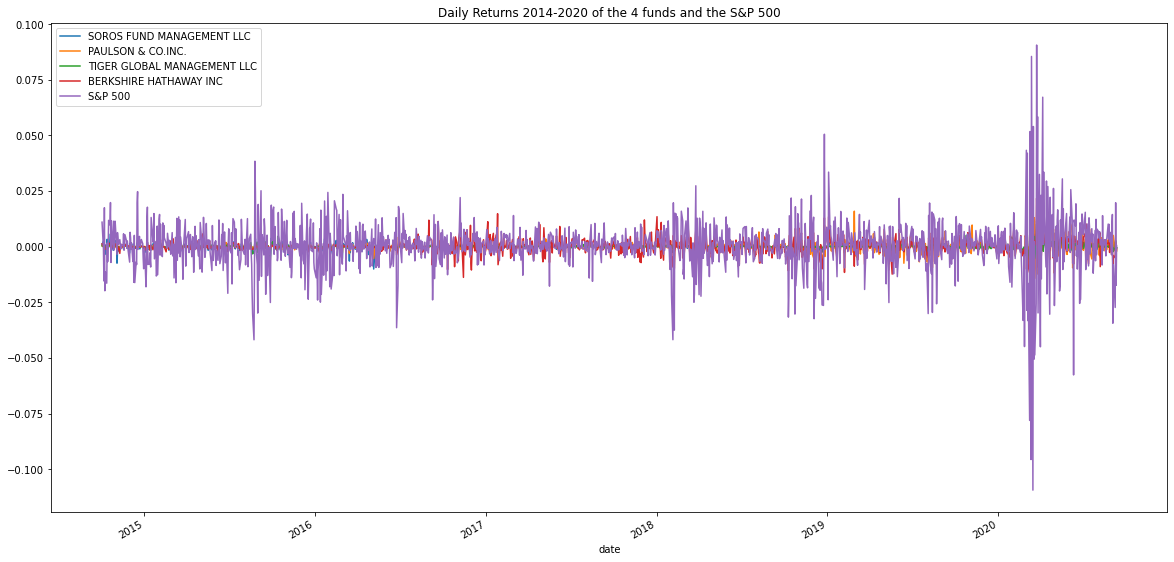

In [8]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
daily_returns.plot(figsize=(20,10), title="Daily Returns 2014-2020 of the 4 funds and the S&P 500")

In [9]:
# Review the daily_returns DataFrame
daily_returns.describe()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
count,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000
mean,-0.000009,-0.000026,0.000036,0.000147,0.000429
std,0.001405,0.002200,0.000996,0.003257,0.011553
min,-0.012910,-0.016720,-0.014563,-0.019076,-0.109424
25%,-0.000380,-0.000534,-0.000193,-0.001083,-0.003207
50%,0.000005,-0.000012,0.000006,0.000027,0.000552
75%,0.000442,0.000498,0.000240,0.001516,0.005162
max,0.011505,0.015944,0.010128,0.021761,0.090603


#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [10]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-03,1.001052,1.000368,1.000394,1.001248,1.011009
2014-10-06,1.003510,1.000360,1.000460,1.001516,1.009826
2014-10-07,1.000880,1.000043,1.000252,1.000929,0.994238
2014-10-08,1.001271,1.000413,1.000494,1.001772,1.011627
2014-10-09,0.997742,0.999644,1.000127,1.000855,0.991563
...,...,...,...,...,...
2020-09-04,0.987792,0.958043,1.055700,1.244642,1.762373
2020-09-08,0.986076,0.956235,1.054359,1.238396,1.714220
2020-09-09,0.987175,0.958265,1.057206,1.240646,1.748071


In [11]:
# Review the last 5 rows of the cumulative returns DataFrame

cumulative_returns.tail(5)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987792,0.958043,1.055700,1.244642,1.762373
2020-09-08,0.986076,0.956235,1.054359,1.238396,1.714220
2020-09-09,0.987175,0.958265,1.057206,1.240646,1.748071
2020-09-10,0.985934,0.959596,1.055525,1.237670,1.717718
2020-09-11,0.985522,0.957744,1.055067,1.236413,1.718592


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'S&P 500 Cumulative Returns 2014-2020'}, xlabel='date'>

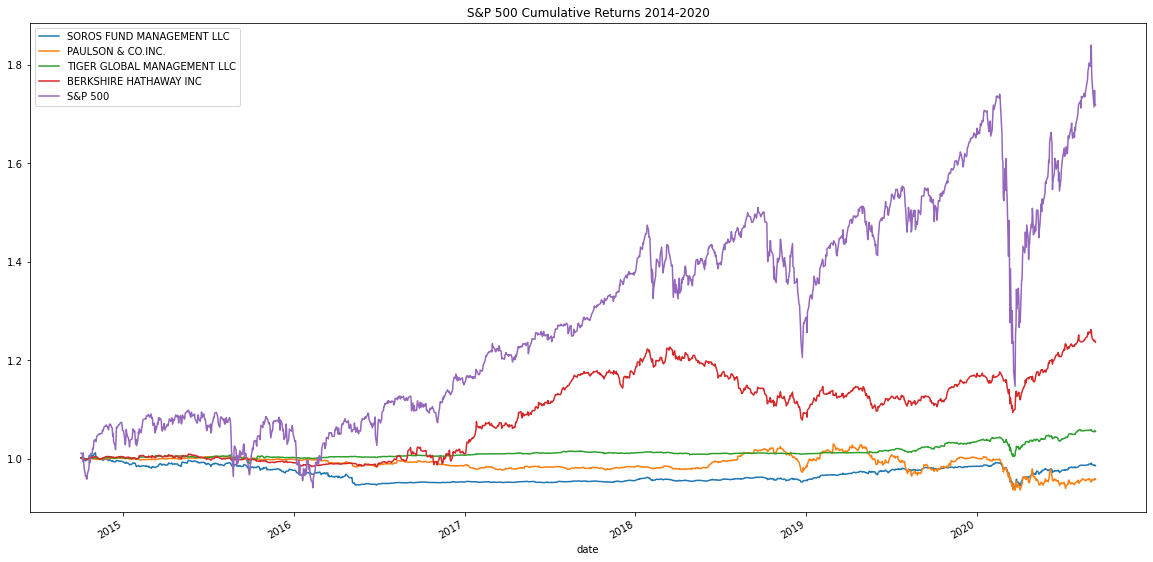

In [12]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
cumulative_returns.plot(figsize=(20,10), title="S&P 500 Cumulative Returns 2014-2020")


#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** # YOUR ANSWER HERE

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Box Plot- Daily Returns 2014-2020 of the 4 funds and the S&P 500'}>

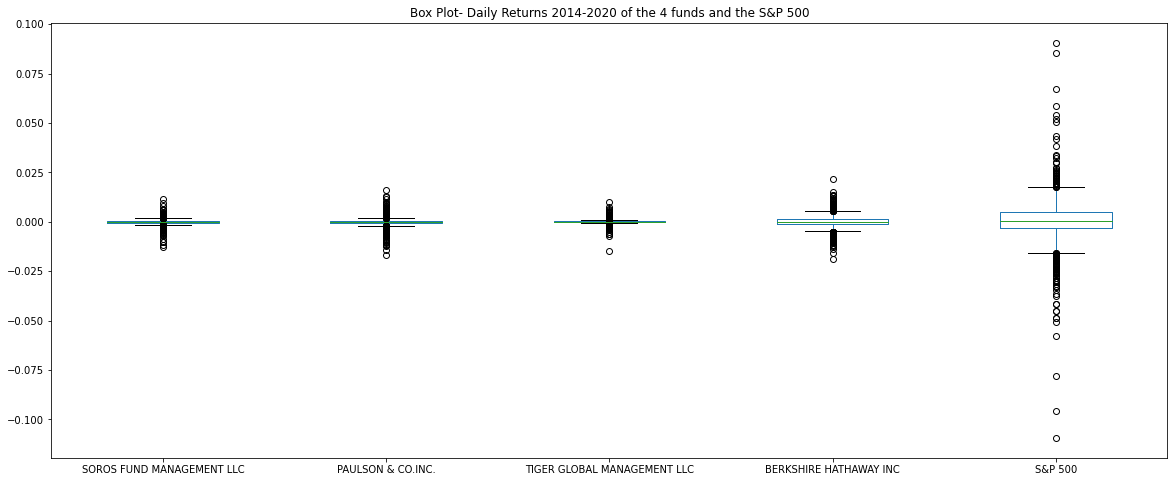

In [13]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
daily_returns.plot.box(figsize=(20,8), title="Box Plot- Daily Returns 2014-2020 of the 4 funds and the S&P 500")

<AxesSubplot:title={'center':'4 Portfolios vs S&P 500'}>

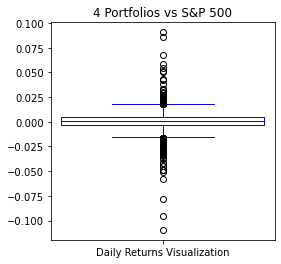

In [119]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
    
daily_returns['S&P 500'].plot.box(legend=True, figsize=(4, 4), positions=[0], widths=2.0, title= "4 Portfolios vs S&P 500", color="blue", label="Daily Returns Visualization")

<AxesSubplot:title={'center':'4 Portfolios vs S&P 500'}>

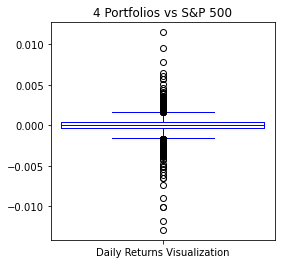

In [120]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
    
daily_returns['SOROS FUND MANAGEMENT LLC'].plot.box(legend=True, figsize=(4, 4), positions=[0], widths=2.0, title= "4 Portfolios vs S&P 500", color="blue", label="Daily Returns Visualization")

<AxesSubplot:title={'center':'PAULSON & CO.INC vs S&P 500'}>

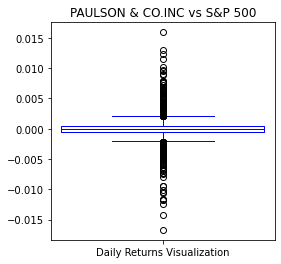

In [121]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
    
daily_returns['PAULSON & CO.INC.'].plot.box(legend=True, figsize=(4, 4), positions=[0], widths=2.0, title= "PAULSON & CO.INC vs S&P 500", color="blue", label="Daily Returns Visualization")

<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT LLC vs S&P 500'}>

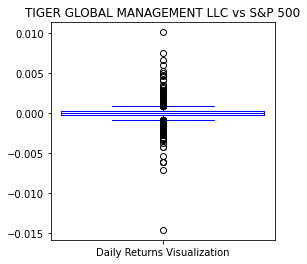

In [122]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size

daily_returns['TIGER GLOBAL MANAGEMENT LLC'].plot.box(legend=True, figsize=(4, 4), positions=[0], widths=2.0, title= "TIGER GLOBAL MANAGEMENT LLC vs S&P 500", color="blue", label="Daily Returns Visualization")

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC vs S&P 500'}>

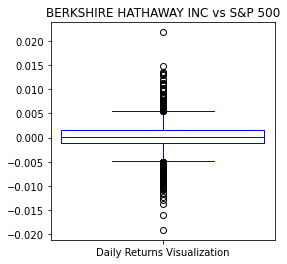

In [123]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
    
daily_returns['BERKSHIRE HATHAWAY INC'].plot.box(legend=True, figsize=(4, 4), positions=[1], widths=2.0, title= "BERKSHIRE HATHAWAY INC vs S&P 500", color="blue", label="Daily Returns Visualization")

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [124]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
# Drop any rows with all missing values
#whale_navs_df.drop(whale_navs_df.loc[:, 'S&P 500'].columns, axis=1, inplace=True)

newdf = whale_navs_df.drop(
    labels=None, 
    axis=None, 
    index=None, 
    columns=["S&P 500", "pct_change"], 
    level=None, 
    inplace=False, 
    errors='raise'
)

newdf

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-10-02,31.936110,14.994072,59.978626,51.957619
2014-10-03,31.969707,14.999596,60.002264,52.022484
2014-10-06,32.048215,14.999471,60.006244,52.036387
2014-10-07,31.964216,14.994720,59.993735,52.005864
2014-10-08,31.976694,15.000260,60.008249,52.049662
...,...,...,...,...
2020-09-04,31.546221,14.364969,63.319419,64.668648
2020-09-08,31.491425,14.337851,63.238988,64.344083
2020-09-09,31.526541,14.368297,63.409792,64.460992


In [20]:
# Daily_returns for the 4 portfiolis
daily_return_4portfolio = newdf.pct_change().dropna()
daily_return_4portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-10-03,0.001052,0.000368,0.000394,0.001248
2014-10-06,0.002456,-0.000008,0.000066,0.000267
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587
2014-10-08,0.000390,0.000369,0.000242,0.000842
2014-10-09,-0.003525,-0.000769,-0.000367,-0.000915
...,...,...,...,...
2020-09-04,-0.001079,0.005050,-0.000653,-0.003985
2020-09-08,-0.001737,-0.001888,-0.001270,-0.005019
2020-09-09,0.001115,0.002123,0.002701,0.001817


<AxesSubplot:title={'center':'Box Plot- return data for only the 4 fund portfolios'}>

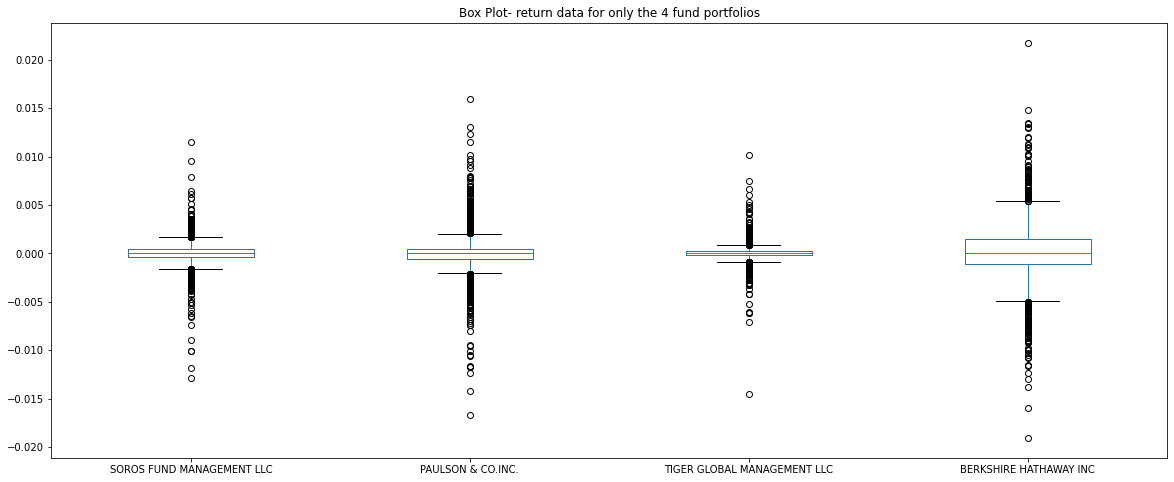

In [21]:
# Create box plots to reflect the return data for only the 4 fund portfolios
# Drop any rows with all missing values
daily_return_4portfolio.plot.box(figsize=(20,8), title="Box Plot- return data for only the 4 fund portfolios")

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** # YOUR ANSWER HERE

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [22]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500

standard_deviation = daily_returns.std()

# Display results
standard_deviation.head()

SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002200
TIGER GLOBAL MANAGEMENT LLC    0.000996
BERKSHIRE HATHAWAY INC         0.003257
S&P 500                        0.011553
dtype: float64

In [23]:
# Review the standard deviations sorted smallest to largest

standard_deviation_sorted = standard_deviation.sort_values()

# Display results
standard_deviation_sorted

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002200
BERKSHIRE HATHAWAY INC         0.003257
S&P 500                        0.011553
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [24]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
annualized_standard_deviation_4portfolio_sp500 = standard_deviation * np.sqrt(252)

# Display the sorted results
annualized_standard_deviation_4portfolio_sp500.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015810
SOROS FUND MANAGEMENT LLC      0.022303
PAULSON & CO.INC.              0.034924
BERKSHIRE HATHAWAY INC         0.051710
S&P 500                        0.183406
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily returns 4 portfolios and the S&P 500 - 21-Day Rolling Standard Deviation'}, xlabel='date'>

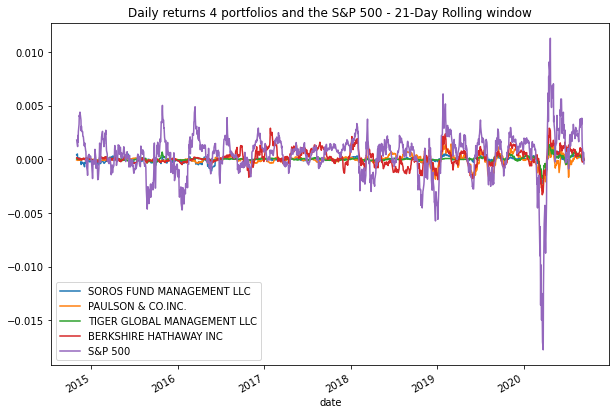

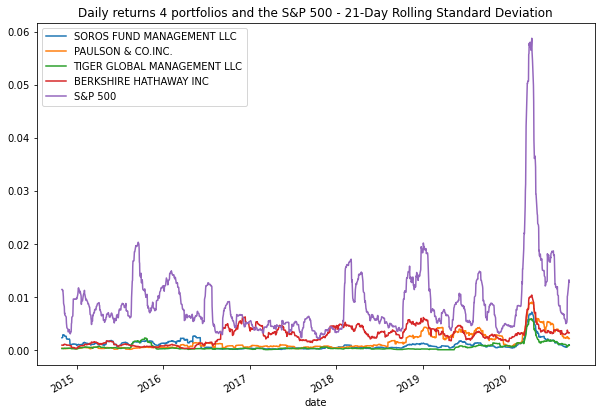

In [25]:
# Using the daily returns DataFrame and a 21-day rolling window
daily_returns.rolling(window=21).mean().plot(
    figsize=(15, 8),
    title="Daily returns 4 portfolios and the S&P 500 - 21-Day Rolling window"
)

# Plot a rolling 21-day standard deviation of the 4 portfolios and the S&P 500
daily_returns.rolling(window=21).std().plot(
    figsize=(15, 8),
    title="Daily returns 4 portfolios and the S&P 500 - 21-Day Rolling Standard Deviation"
)

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily returns 4 portfolios - 21-Day Rolling Standard Deviation'}, xlabel='date'>

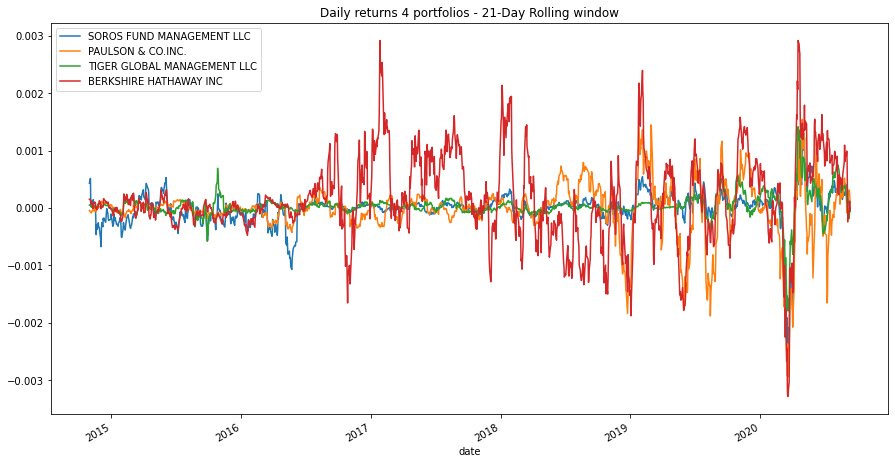

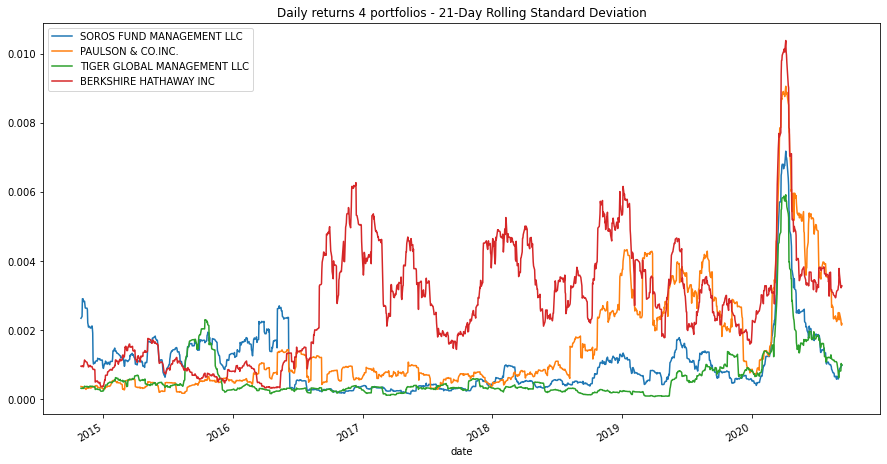

In [26]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios.
# Include a title parameter and adjust the figure size
daily_return_4portfolio.rolling(window=21).mean().plot(
    figsize=(15, 8),
    title="Daily returns 4 portfolios - 21-Day Rolling window"
)

# Plot a rolling 21-day standard deviation of the 4 portfolios and the S&P 500
daily_return_4portfolio.rolling(window=21).std().plot(
    figsize=(15, 8),
    title="Daily returns 4 portfolios - 21-Day Rolling Standard Deviation"
)

#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** # YOUR ANSWER HERE

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** # YOUR ANSWER HERE


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # YOUR ANSWER HERE

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [28]:
# Set the number of trading days for the year
year_trading_days = 252

# To calculate the annualized average return of  4 portfolios and the S&P 500,
# calculate the mean of the daily return values for each stock in ' 4 portfolios and the S&P 500'
# and then multiply that by the number of trading days in the year
average_annual_return_4portfolio_sp500 = daily_returns.mean() * year_trading_days

# Display the average annual return values for each stock in ' 4 portfolios and the S&P 500'
average_annual_return_4portfolio_sp500

SOROS FUND MANAGEMENT LLC     -0.002208
PAULSON & CO.INC.             -0.006663
TIGER GLOBAL MANAGEMENT LLC    0.009155
BERKSHIRE HATHAWAY INC         0.037086
S&P 500                        0.108149
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [29]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
# YOUR CODE HERE


In [38]:
# Calculate Sharpe Ratio by dividing the average annual return by the standard deviation
sharpe_ratios_4portfolio_sp500 = average_annual_return_4portfolio_sp500 / annualized_standard_deviation_4portfolio_sp500
sharpe_ratios_4portfolio_sp500

SOROS FUND MANAGEMENT LLC     -0.098987
PAULSON & CO.INC.             -0.190785
TIGER GLOBAL MANAGEMENT LLC    0.579054
BERKSHIRE HATHAWAY INC         0.717193
S&P 500                        0.589668
dtype: float64

In [31]:
# Display sorted results
sharpe_ratios_4portfolio_sp500.sort_values()

PAULSON & CO.INC.             -0.190785
SOROS FUND MANAGEMENT LLC     -0.098987
TIGER GLOBAL MANAGEMENT LLC    0.579054
S&P 500                        0.589668
BERKSHIRE HATHAWAY INC         0.717193
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Sharpe Ratios for 4portfolio_sp500'}>

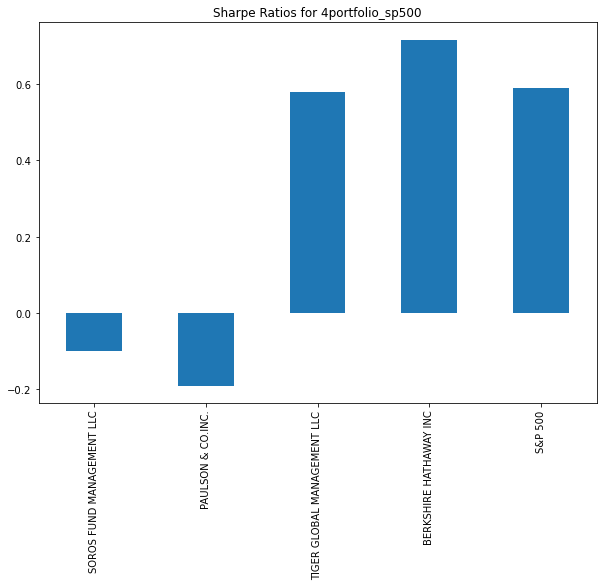

In [32]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
sharpe_ratios_4portfolio_sp500.plot.bar(figsize=(10, 7), title="Sharpe Ratios for 4portfolio_sp500")

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # YOUR ANSWER HERE

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [33]:
#Calculate daily returns for S&P 500
daily_returnsp500 = daily_returns['S&P 500']
daily_returnsp500

date
2014-10-03    0.011009
2014-10-06   -0.001170
2014-10-07   -0.015436
2014-10-08    0.017489
2014-10-09   -0.019833
                ...   
2020-09-04   -0.008165
2020-09-08   -0.027323
2020-09-09    0.019747
2020-09-10   -0.017364
2020-09-11    0.000509
Name: S&P 500, Length: 1496, dtype: float64

In [34]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.

variance_4portfolio = daily_return_4portfolio.rolling(window=60).var().dropna()

variance_4portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-12-29,0.000004,1.130187e-07,9.482189e-08,6.297534e-07
2014-12-30,0.000004,1.110504e-07,9.297971e-08,6.062019e-07
2014-12-31,0.000004,1.134085e-07,9.581520e-08,6.124902e-07
2015-01-02,0.000003,1.119369e-07,9.490804e-08,6.059927e-07
2015-01-05,0.000004,1.197958e-07,1.114600e-07,6.399640e-07
...,...,...,...,...
2020-09-04,0.000001,9.110231e-06,1.522459e-06,1.152960e-05
2020-09-08,0.000001,9.065787e-06,1.533709e-06,1.177922e-05
2020-09-09,0.000001,8.803194e-06,1.634040e-06,1.175119e-05


In [35]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.

variance_sp500df = daily_returns['S&P 500'].rolling(window=60).var().dropna()

variance_sp500df

date
2014-12-29    0.000078
2014-12-30    0.000077
2014-12-31    0.000079
2015-01-02    0.000075
2015-01-05    0.000076
                ...   
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, Length: 1437, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [66]:
# Calculate the covariance using a 60-day rolling window 

paulson_covariance = daily_returns['PAULSON & CO.INC.'].rolling(window=60).cov(daily_returnsp500).dropna()

# Display the covariance
paulson_covariance

date
2014-12-29    0.000002
2014-12-30    0.000002
2014-12-31    0.000002
2015-01-02    0.000002
2015-01-05    0.000002
                ...   
2020-09-04    0.000009
2020-09-08    0.000010
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
Length: 1437, dtype: float64

In [67]:
# Review the last five rows of the covariance data
paulson_covariance.head()

date
2014-12-29    0.000002
2014-12-30    0.000002
2014-12-31    0.000002
2015-01-02    0.000002
2015-01-05    0.000002
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [68]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)

portfolio4_beta = paulsoncovariance / variance_sp500df
portfolio4_beta

date
2014-12-29    0.022093
2014-12-30    0.021744
2014-12-31    0.022079
2015-01-02    0.022176
2015-01-05    0.023683
                ...   
2020-09-04    0.085217
2020-09-08    0.087760
2020-09-09    0.084976
2020-09-10    0.084373
2020-09-11    0.083657
Length: 1437, dtype: float64

In [69]:

# Review the last five rows of the beta information
portfolio4_beta.tail()


date
2020-09-04    0.085217
2020-09-08    0.087760
2020-09-09    0.084976
2020-09-10    0.084373
2020-09-11    0.083657
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [92]:
# Calculate the average value of the 60-day rolling beta of the portfolio.
portfolio4_beta.mean()


0.07771666795203515

In [94]:
# Calculate the average of the 60-day rolling 
# YOUR CODE HERE
Paulson_avearge = daily_returns['PAULSON & CO.INC.'].rolling(window=60).mean().dropna()

Paulson_avearge


date
2014-12-29    1.427775e-05
2014-12-30    6.476307e-06
2014-12-31    4.538966e-07
2015-01-02    7.922283e-06
2015-01-05   -1.118716e-05
                  ...     
2020-09-04    2.929729e-05
2020-09-08    3.915093e-05
2020-09-09   -1.686901e-07
2020-09-10    4.557253e-05
2020-09-11    4.006712e-05
Name: PAULSON & CO.INC., Length: 1437, dtype: float64

In [95]:
# Calculate the average of the 60-day rolling beta for the 4 portfolios

portfolio4_avearge = daily_return_4portfolio.rolling(window=60).mean().dropna()


portfolio4_avearge


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-12-29,-0.000084,1.427775e-05,0.000039,0.000072
2014-12-30,-0.000108,6.476307e-06,0.000031,0.000049
2014-12-31,-0.000165,4.538966e-07,0.000023,0.000035
2015-01-02,-0.000122,7.922283e-06,0.000027,0.000044
2015-01-05,-0.000172,-1.118716e-05,0.000006,0.000003
...,...,...,...,...
2020-09-04,0.000272,2.929729e-05,0.000249,0.000725
2020-09-08,0.000218,3.915093e-05,0.000203,0.000562
2020-09-09,0.000213,-1.686901e-07,0.000236,0.000553


<AxesSubplot:title={'center':'Daily returns 4 portfolios - 60-Day Rolling Standard Deviation'}, xlabel='date'>

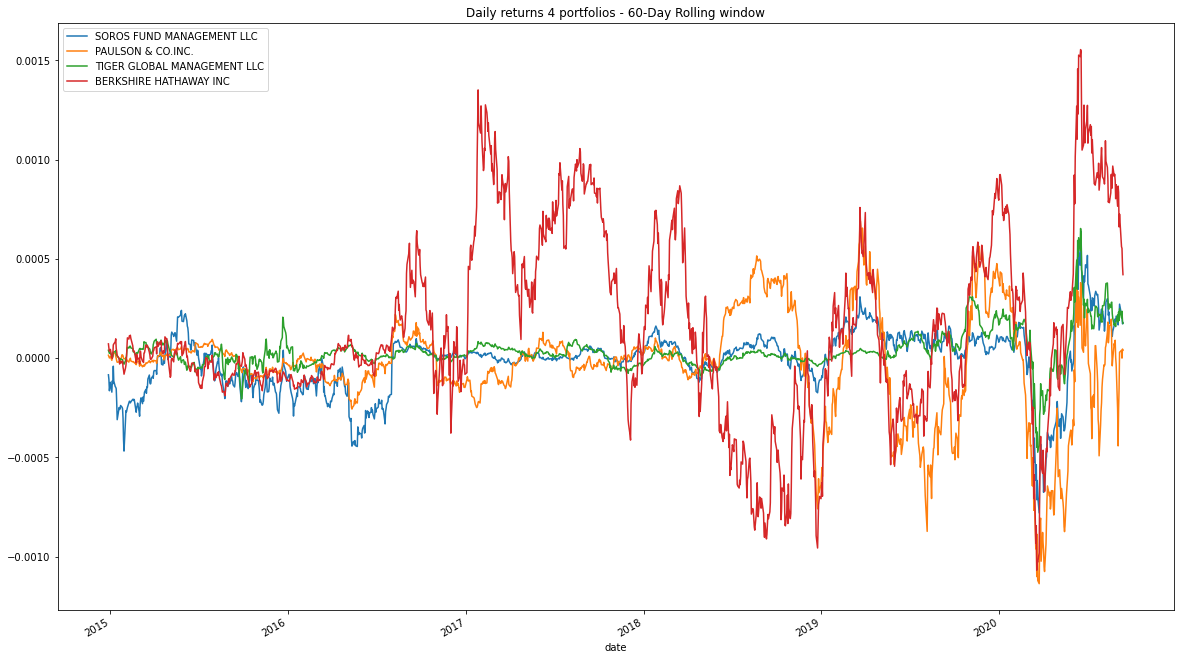

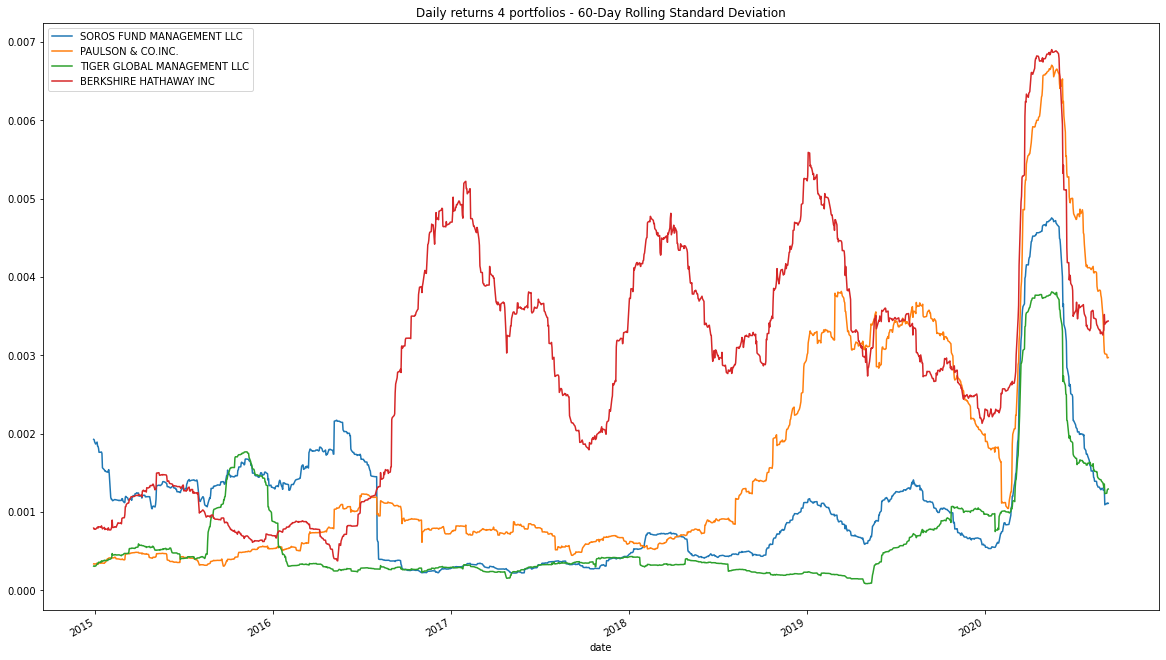

In [117]:
# Using the daily return data and a 60-day rolling window, plot the rolling standard deviation of just the 4 portfolios.
# Include a title parameter and adjust the figure size
portfolio4_avearge.plot(
    figsize=(20, 12),
    title="Daily returns 4 portfolios - 60-Day Rolling window"
)

# Plot a rolling 21-day standard deviation of the 4 portfolios and the S&P 500
daily_return_4portfolio.rolling(window=60).std().plot(
    figsize=(20, 12),
    title="Daily returns 4 portfolios - 60-Day Rolling Standard Deviation"
)

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'portfolio4 - Rolling 60-Day Beta vs S&P 500'}, xlabel='date'>

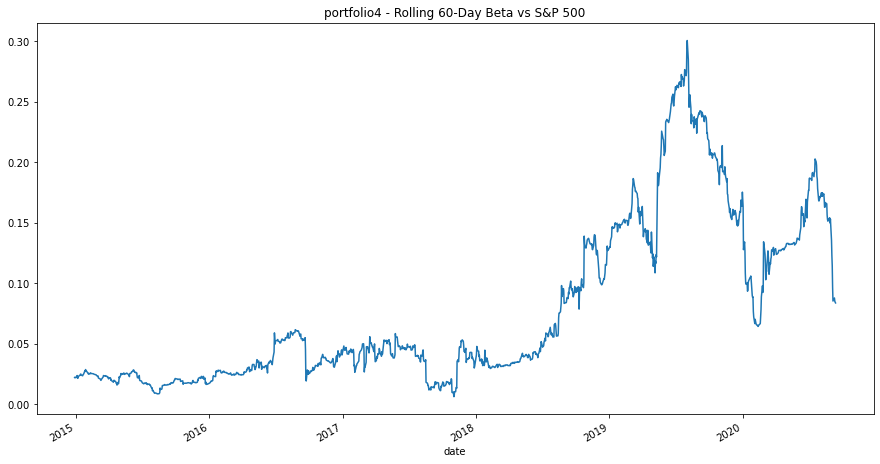

In [99]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
portfolio4_beta.plot(
    figsize=(15, 8),
    title='portfolio4 - Rolling 60-Day Beta vs S&P 500'
)

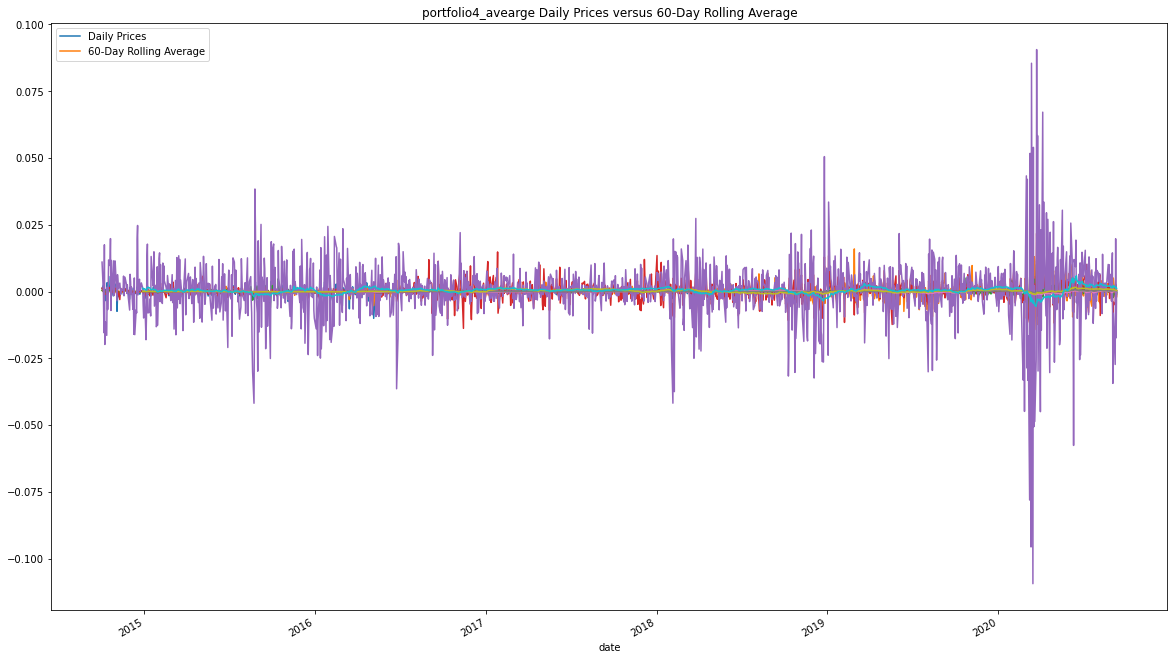

In [113]:
# Set the plot of portfolio4 daily prices as the main plot in the overlay
ax = daily_returns.plot(figsize=(20,12), title="portfolio4_avearge Daily Prices versus S&P500 60-Day Rolling Average")

# Plot the 60-day rolling metric as an overlay on the plot
daily_returns.rolling(window=60).mean().plot(ax=ax)

# Create the legend for the figure
ax.legend(["Daily Prices", "60-Day Rolling Average"])

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [104]:
# Calculate the covariance using a 60-day rolling window 

berkshire_covariance = daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(daily_returnsp500).dropna()

# Display the covariance
berkshire_covariance

date
2014-12-29    0.000004
2014-12-30    0.000003
2014-12-31    0.000004
2015-01-02    0.000003
2015-01-05    0.000004
                ...   
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
Length: 1437, dtype: float64

In [105]:
# Review the last five rows of the covariance data
berkshire_covariance.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [106]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
berkshire_beta = berkshire_covariance / variance_sp500df
berkshire_beta

date
2014-12-29    0.046960
2014-12-30    0.045166
2014-12-31    0.045679
2015-01-02    0.046140
2015-01-05    0.049192
                ...   
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
Length: 1437, dtype: float64

In [109]:
# Review the last five rows of the beta information
berkshire_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [107]:
# Calculate the average value of the 60-day rolling beta of the portfolio.

berkshire_beta.mean()

0.22162009834099244

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'berkshire_beta - Rolling 60-Day Beta'}, xlabel='date'>

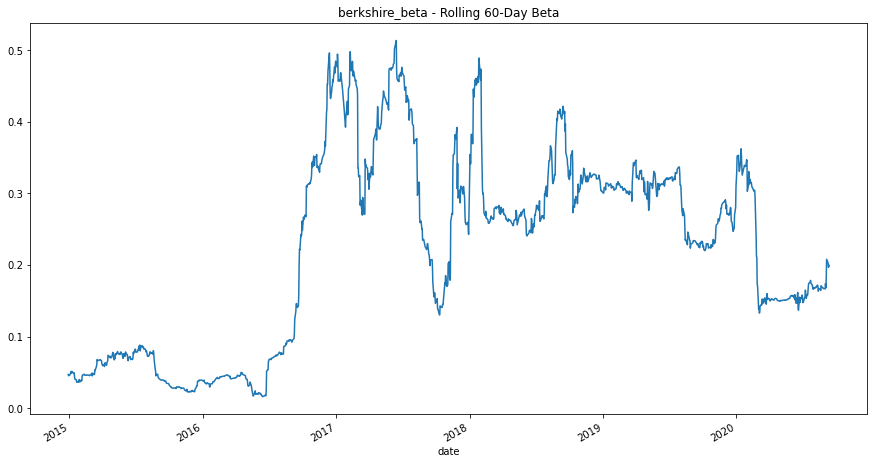

In [108]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
berkshire_beta.plot(
    figsize=(15, 8),
    title='berkshire_beta - Rolling 60-Day Beta'
)

#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # YOUR ANSWER HERE


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # YOUR ANSWER HERE

---